###  Using the follwing to lunch gateway
https://interactivebrokers.github.io/cpwebapi/quickstart

1. cd clientportal.gw 
1. bin/run.sh root/conf.yaml
1. https://localhost:5000 
1. https://localhost:5000/demo#/
1. https://www.interactivebrokers.com/api/doc.html
1. https://localhost:5000/v1/api/iserver/contract/270639/info

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader
import datetime as dt
import robin_stocks.robinhood as robin

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from IPython.display import display, HTML
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:,.4f}'.format
display(HTML("<style>.container { width:96% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

import import_ipynb
import portfolio_robinhood as robinhood
import portfolio_ibkr as ibkr

importing Jupyter notebook from portfolio_robinhood.ipynb
importing Jupyter notebook from general_functions.ipynb
importing Jupyter notebook from portfolio_ibkr.ipynb


In [3]:
import import_ipynb
from general_functions import *

In [4]:
ibkr_csv_file_name='csv_from_interactive_broker'
ibkr_account_number = 'interactive_broker_account_number'
robinhood_user_name = 'robinhood_user_name'
robinhodd_pass_Word = 'robinhood_password'

# Robinhood Analytics Standalone  

In [9]:
dict_my_portfolio_robinhood  = robinhood.my_portfolio(robinhood_user_name,robinhodd_pass_Word)
dict_trade_histroy_robinhood = robinhood.trade_histroy(robinhood_user_name,robinhodd_pass_Word)

400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=RSXJ
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=RSXJ
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=RSX
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=RSX
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=OGZPY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=OGZPY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=SBRCY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=SBRCY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=SGTPY
400 Client Error: Bad Request for url: https://api.robinhood.com/quotes/?symbols=SGTPY
400 Client Error: Bad Request for url: https://api.robinhood.com/fundamentals/?symbols=MBT
400 Client Erro


2 Failed downloads:
['USD=X']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1689367357. Only 100 years worth of day granularity data are allowed to be fetched per request.')
['SGD=X']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1899-12-31 -> 2023-07-14)')



Number of symbosl to search on yahoo 122
122 quote from Yfinance
retrieved attributes form yahoo finance
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
getting current prices
Portfolio Data Retrival Compeleted
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading page 4 ...
Loading page 5 ...
Loading page 6 ...
Loading page 7 ...
Loading page 8 ...
Loading page 9 ...
Loading page 10 ...
Loading page 11 ...
Loading page 12 ...
Loading page 13 ...
Loading page 14 ...
Loading page 15 ...
Loading page 16 ...
Loading page 17 ...
Loading page 18 ...
Trade histroy retrieval completed


In [32]:
portfolio_analytics(dict_my_portfolio_robinhood,dict_trade_histroy_robinhood,height=500,width=1400)

# Interactive Broker Analytics Standalone  

### How to get CSV from IBKR

1. #### Head to Portfolio Analyst--> Report --> Custom Report add the fields shown in the pciture below
1. #### run the report and save result as CSV
1. #### place the CVS where you run the portfolio_analytics.ipynb

<img src="blob:chrome-untrusted://media-app/4edd04a8-43a3-4f9f-9142-dfd87f0532f8" alt=".png"/>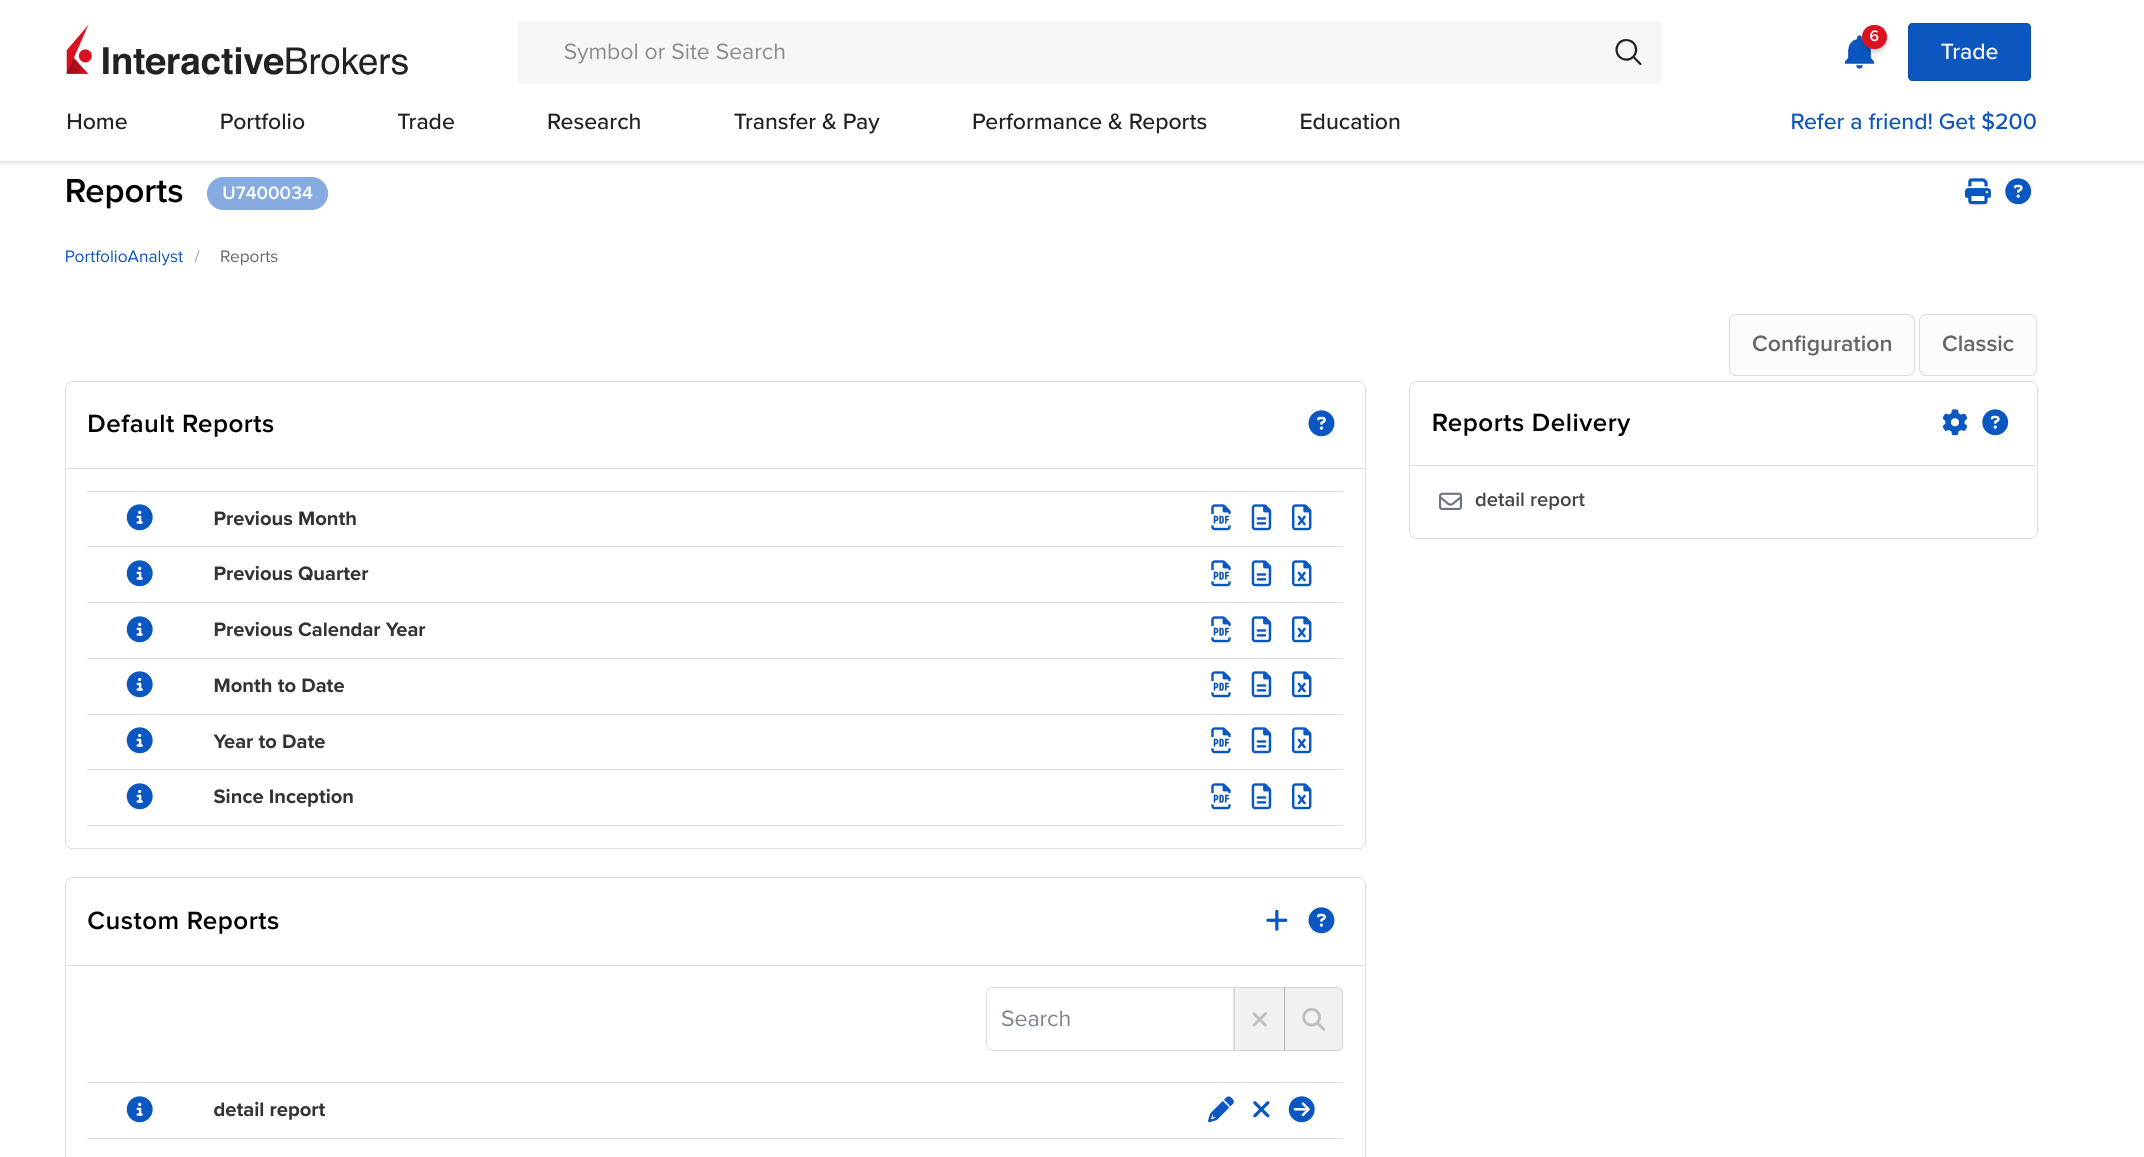

<img src="blob:chrome-untrusted://media-app/9100a512-41c5-49d0-be42-b53d1f0755b7" alt="AM.png"/>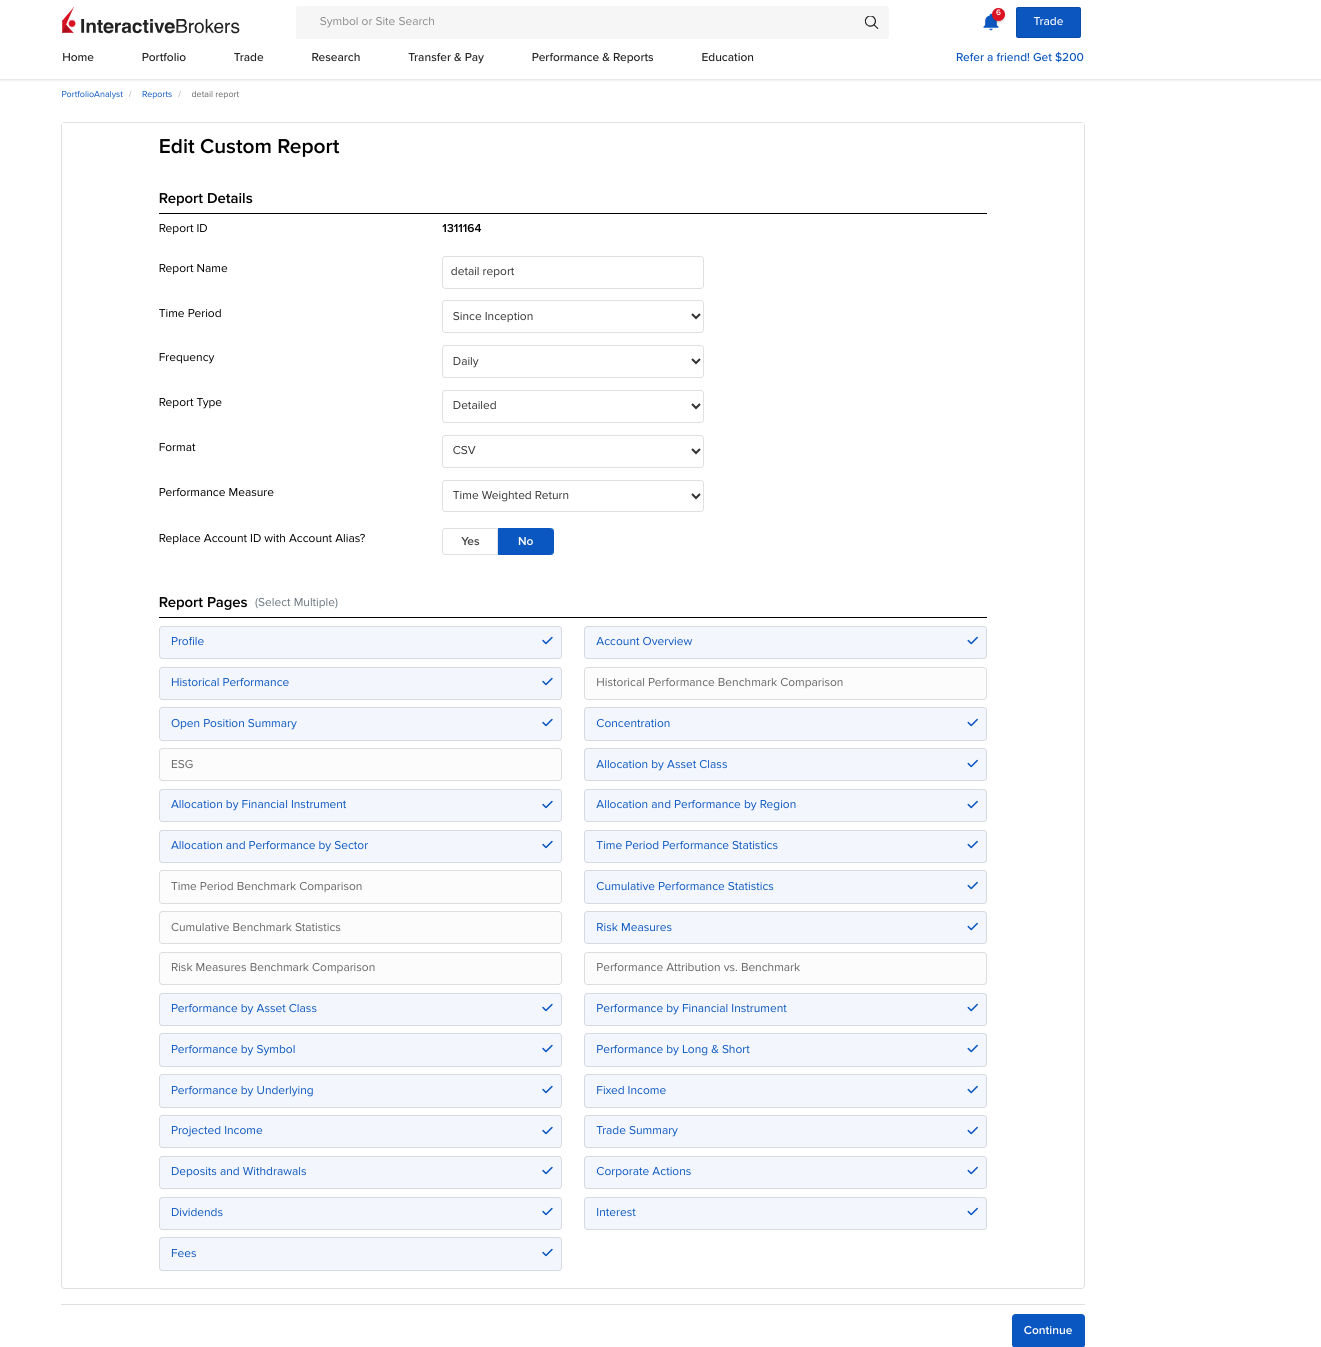

In [ ]:
dict_my_portfolio_ibkr  = ibkr.my_portfolio(ibkr_csv_file_name,ibkr_account_number)
dict_trade_histroy_ibkr = ibkr.trade_histroy(ibkr_csv_file_name,ibkr_account_number)

In [ ]:
portfolio_analytics(dict_my_portfolio_ibkr,dict_trade_histroy_ibkr,height=500,width=1400)

### Interactive Broker + Robinhood Analytics 

In [14]:
# %run general_functions.ipynb
conolidated_res = portfolio_consolidator(dict_my_portfolio_robinhood,
                                         dict_trade_histroy_robinhood,
                                         dict_my_portfolio_ibkr,
                                         dict_trade_histroy_ibkr)

dict_my_portfolio = conolidated_res['dict_my_portfolio']
dict_trade_histroy = conolidated_res['dict_trade_histroy']

### Visualize holding 
I annomized my portfolio data, that's why it may seem weird

,begins_at,close_market_value,adjusted_close_equity,PnL,CumPnL,Return,CumReturn
1819,2023-07-09,0.9836,0.9445,0.4282,0.8460,0.8937,0.9445
1820,2023-07-10,0.9898,0.9656,0.5476,0.8795,0.9129,0.9656
1821,2023-07-11,1.0000,1.0000,0.6232,0.9341,0.9248,1.0000
1822,2023-07-12,0.6986,0.0000,0.5420,0.9660,0.0000,0.0000
1823,2023-07-13,0.7048,0.0214,0.5495,1.0000,0.9205,0.0214


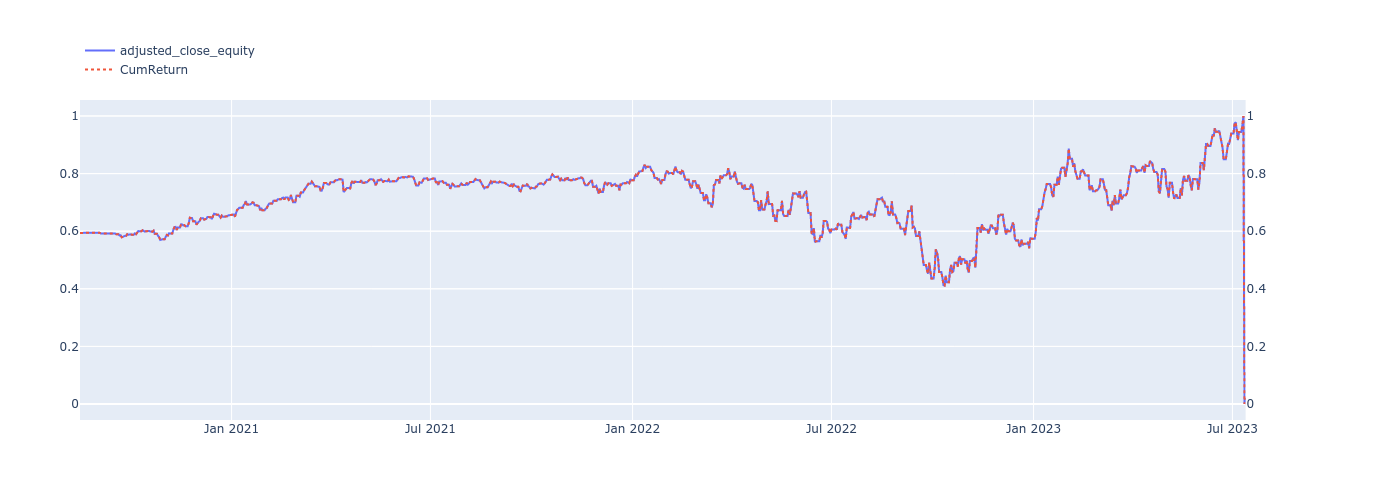

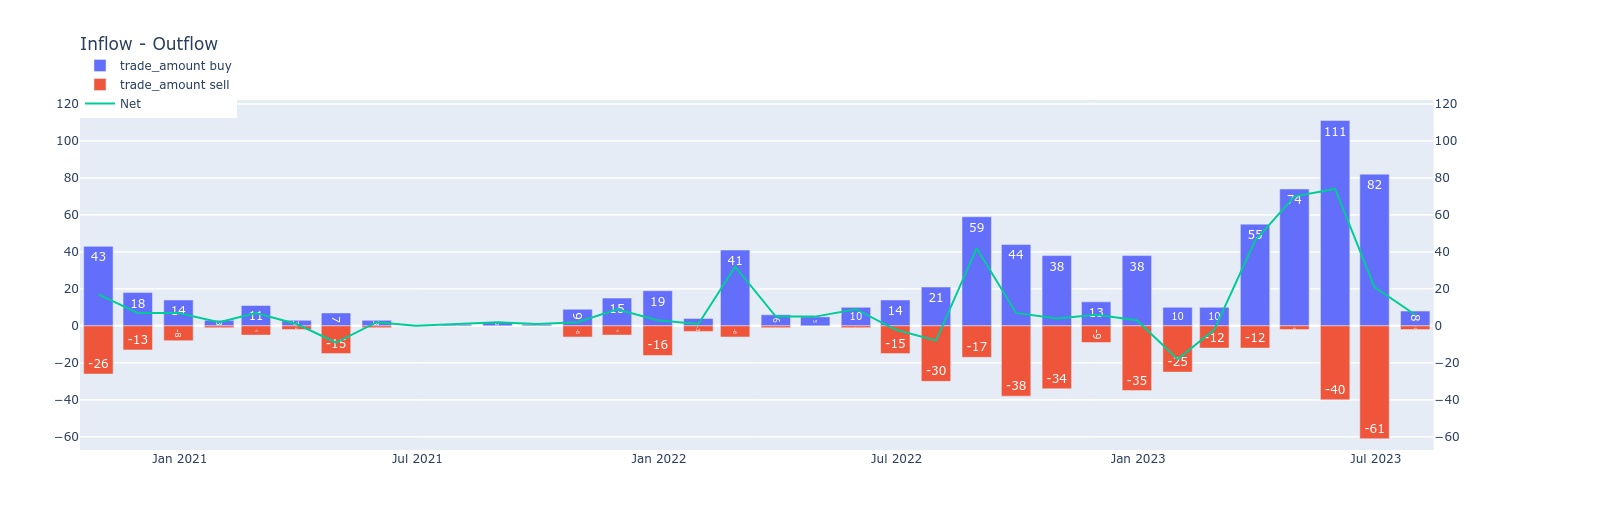

Sector | Holding Summary


,sector,ROA,ROE,equity,equity_initial,equity_change,percent_change,percentage,ev_ebit,firm_to_ebit,pe,fpe,pb,pb_ratio,ev,marketCap,rev,ebit,netIncome,netDebt,grossMargins,operatingMargins,profitMargins,totalCash,totalDebt,currentRatio,quickRatio,grossProfits,ebitda,ocf,ebitdaMargins,freeCashflow,heldPercentInsiders,div_yeild,5y_div_yeild,payoutRatio,fullTimeEmployees,debtToEquity
0,All,7.7217,21.5111,"1,706.0602","1,502.3776","7,964.1162",3.9037,100.0000,5.1875,9.6815,15.3362,6.4695,23.8105,2.0142,36.2993,2.8560,4.2243,"3,290.8289","2,160.8701","-6,683.9293",36.9915,19.8256,13.6743,"33,296.5475","26,612.6182",3.7074,2.2730,"10,378.1758","3,977.1975","4,040.1185",18.7532,"1,731.1349",14.7782,3.5122,3.0303,47.6680,"45,004.6993",60.1229
1,Financial Services,9.4587,20.0654,348.9747,303.8686,"1,185.5362",4.7894,20.3920,4.4827,9.7732,12.4865,10.3995,17.8651,1.9266,35.4674,3.8704,4.9713,"5,138.5525","3,870.0484","8,180.7589",35.8814,17.5555,11.6097,"8,465.9619","16,646.7208",2.4592,2.0831,"10,933.1295","7,389.1454","8,450.2657",22.1922,"2,691.2160",24.4104,3.5999,2.8773,30.4930,"42,395.7895",84.3777
2,Industrials,7.6479,31.9176,309.0191,261.3960,"1,590.9516",8.1015,18.1267,10.1301,13.8993,20.5688,13.3537,23.1743,2.6028,38.5761,4.7631,7.3464,"3,819.6764","2,433.0079","5,169.2662",36.9082,19.7879,8.3557,"16,233.7989","21,403.0652",2.3055,1.6071,"16,198.3853","6,528.7879","4,147.1514",13.9297,"2,918.2520",14.6275,3.4142,3.0196,31.4890,"83,639.2759",49.6260
3,Basic Materials,7.7044,10.7434,222.1880,196.9123,678.8300,2.8900,12.9751,5.6320,10.5199,10.1992,9.3472,33.5459,1.3182,32.3053,2.2328,3.2308,"3,532.3015","2,428.2989","-5,913.4730",26.9135,24.4481,17.0856,"34,799.4337","28,885.9607",3.9566,2.5258,"10,069.7577","2,749.5967","4,669.9036",20.2674,"1,016.0743",13.1895,3.0151,2.9822,31.2436,"38,934.8182",45.0559
4,Communication Services,7.9489,21.5979,206.4638,193.9251,910.1474,-2.5542,12.1020,3.9096,6.1073,5.4358,7.6843,19.4811,1.3527,35.7784,0.5257,1.8259,"1,937.5453",-377.1539,"9,520.5726",37.7834,19.1573,10.6345,"1,042.9996","10,563.5722",3.2642,2.4816,"6,309.4407","3,062.9262","2,364.8282",20.0861,"1,322.1157",14.3013,5.3582,3.1893,30.5988,"23,896.0526",63.1115
5,Consumer Defensive,4.8135,30.7351,149.1267,118.4239,405.3318,14.6254,8.6931,-1.6675,10.9889,30.7335,13.2805,32.4351,0.9506,34.2383,1.1085,2.1764,"3,034.6357","2,423.7338","-63,480.5016",36.7076,29.4861,37.9056,"157,934.6014","94,454.0997",2.4218,1.9144,"14,680.5496",338.0126,"1,271.0762",14.7656,-60.6833,2.6256,5.1583,4.4160,288.9343,"46,708.6667",48.9948
6,Technology,7.3791,9.3909,129.0286,113.6266,"1,097.7970",4.8666,7.6309,0.4728,6.7745,24.2047,10.5856,23.2719,2.2395,35.4335,1.7189,3.3566,"2,753.1025","1,762.8903","-11,821.2736",38.6263,20.0236,17.3230,"56,186.5268","44,365.2532",9.9078,4.3297,"9,496.5071","1,840.6580","3,950.5037",20.8716,"2,078.3482",14.2202,2.8742,2.8786,72.0365,"44,379.3000",117.1954
7,Consumer Cyclical,7.1987,11.5345,125.3122,123.9103,658.8718,-7.2037,7.3637,3.4455,3.8517,10.0932,13.1177,24.5656,2.6483,35.8941,2.4973,5.0779,"1,285.0033",833.6937,"2,288.4719",40.6542,16.8698,10.2623,"3,682.0480","5,970.5199",2.4963,1.4687,"6,245.5800","2,544.1068","1,813.2301",17.0547,-255.8452,12.6395,2.8692,3.0992,33.2292,"37,525.0769",45.1496
8,Miscellaneous,7.8143,33.7829,124.6992,109.2466,723.1359,4.7466,7.3282,7.6469,13.5498,14.8605,12.6645,26.1977,1.7992,35.8087,2.9862,2.3346,"1,845.2604","2,391.8849",-415.9638,36.6904,19.2795,16.9247,"6,348.3180","5,932.3542",3.3386,2.1146,"2,446.5704","2,382.7423","3,291.5944",18.0322,"1,885.9879",10.6035,1.9863,2.0375,13.2093,"17,097.2000",29.5962
9,Real Estate,4.1830,24.3247,46.9219,42.8350,139.7053,-0.0998,2.7404,-3.0653,-12.5387,-0.6997,-619.0000,7.8270,1.5817,35.1485,0.8041,0.2819,"-1,111.0050","-1,147.0001","-7,772.9997",72.8000,-74.0670,-76.4670,"10,524.9997","2,752.0000",1.2460,0.6690,906.0000,NaN,-461.0000,0.0000,NaN,8.0590,4.5402,NaN,0.0000,"2,300.0000",39.0580


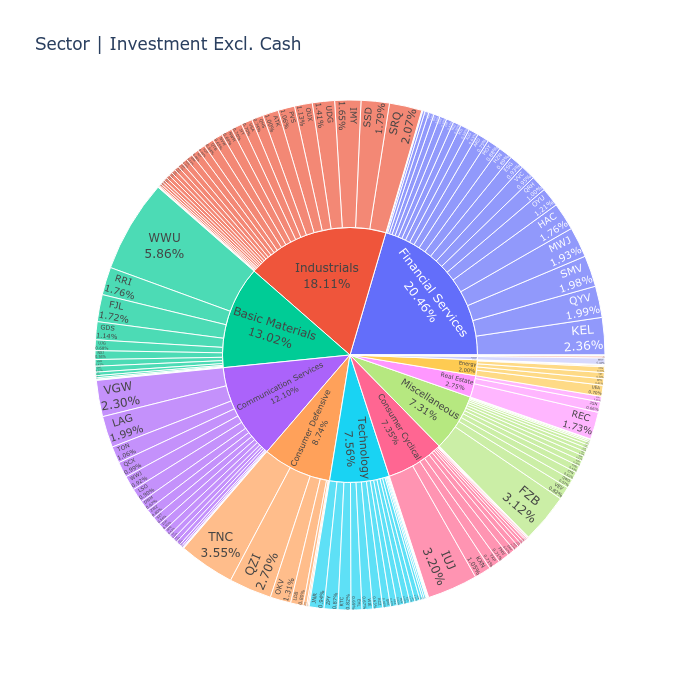

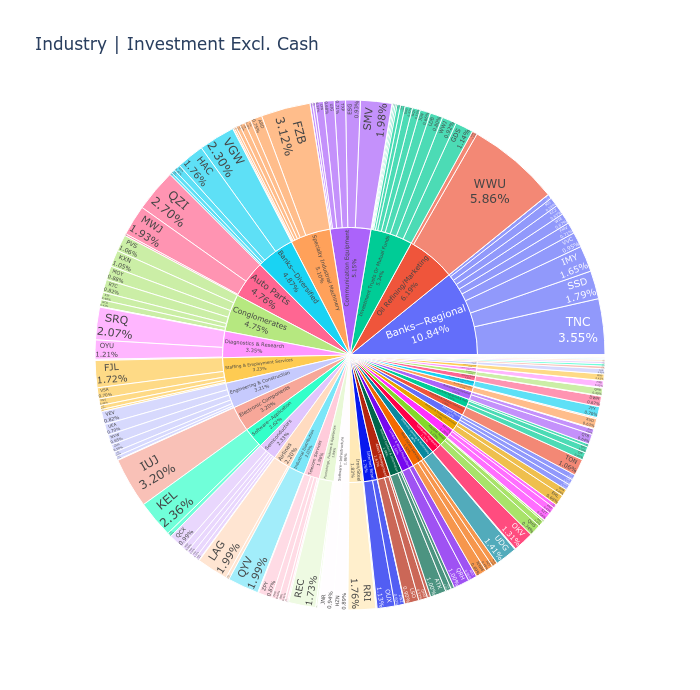

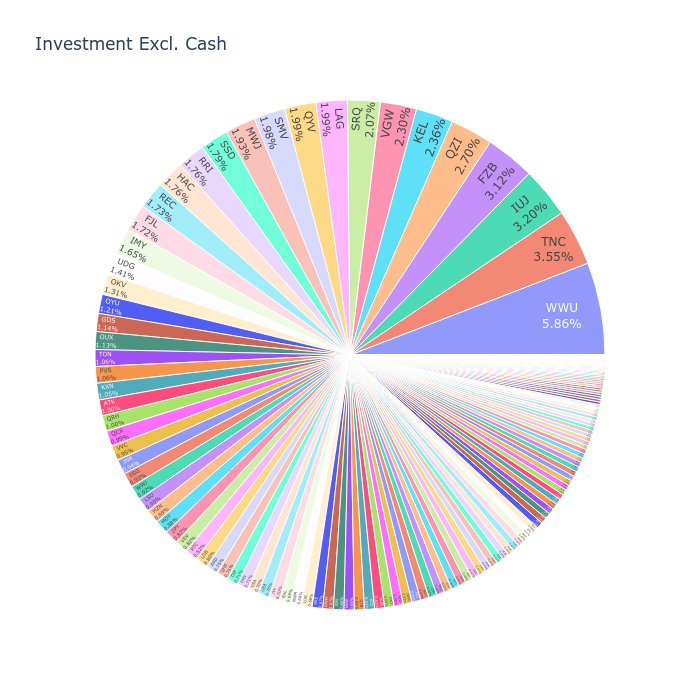

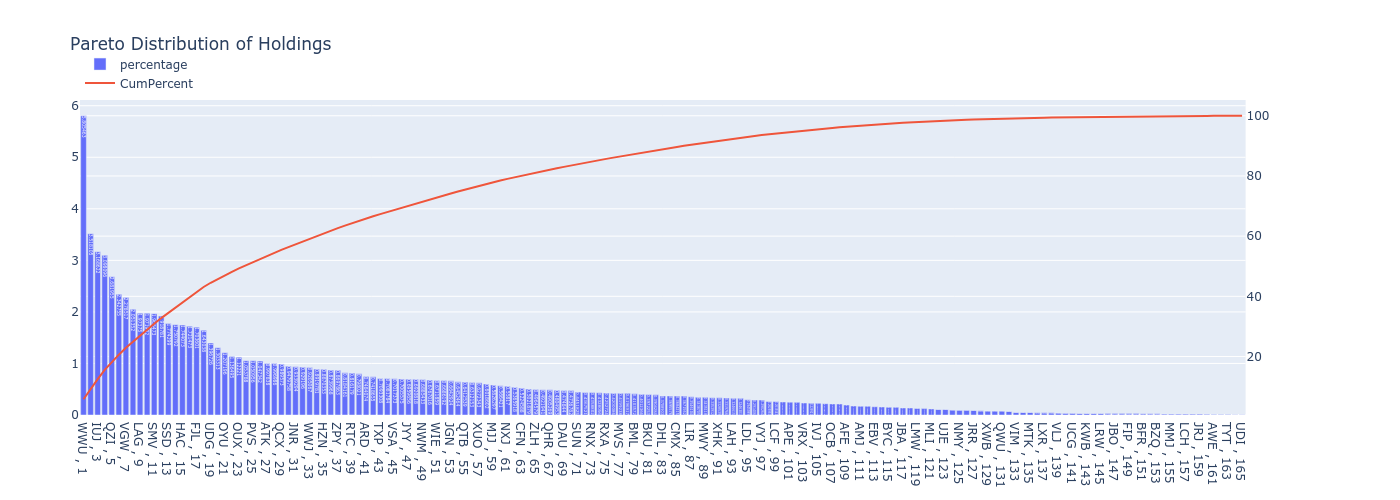

,rank,symbol,name,sector,industry,ROA,ROE,quantity,equity,equity_initial,equity_change,percent_change,percentage,CumPercent,ave_price,price,ev_ebit,firm_to_ebit,pe,fpe,pb,pb_ratio,ev,marketCap,rev,ebit,netIncome,netDebt,grossMargins,operatingMargins,profitMargins,totalCash,totalDebt,currentRatio,quickRatio,grossProfits,ebitda,ocf,ebitdaMargins,freeCashflow,heldPercentInsiders,div_yeild,5y_div_yeild,payoutRatio,fullTimeEmployees,debtToEquity,boker_equity_K,exchange,symbolCurrency,financialCurrency
0,1,WWU,WBXZDNKC,Basic Materials,Oil Refining/Marketing,10.85,7.85,2,100,100,4,-9.35,5.81,5.81,57.75,9.56,11.69,11.93,12.70,14.78,54.55,0.96,36,1,10,"2,332","1,507","8,380",8.29,4.35,2.81,550,"8,930",1.66,0.56,"6,624.00","3,538","2,232",6.60,-376,2.30,3.72,2.34,44.98,"142,000",45.66,0,NYQ,USD,USD
1,2,TNC,AVGFXXZV,Consumer Defensive,Banks—Regional,8.16,19.96,1,61,58,33,-5.21,3.52,9.32,48.32,8.36,-18.12,36.66,6.28,7.39,96.60,0.47,28,6,14,"19,724","14,223","-446,422",0.00,27.64,21.22,"1,080,458","634,036",nan,nan,"70,560.00",nan,"3,831",0.00,nan,0.20,4.28,3.38,28.02,"240,000",nan,0,NYQ,USD,USD
2,3,IUJ,PFESONGF,Consumer Cyclical,Electronic Components,7.19,27.27,2,55,60,0,-17.15,3.17,12.49,40.02,6.04,-73.25,-85.78,-49.21,19.05,23.51,1.41,38,10,11,"-2,198","-2,857","22,739",38.34,-3.90,-5.06,"27,534","50,273",1.76,1.15,"26,866.00","9,855","7,757",17.47,"-10,188",0.06,1.47,2.98,nan,"131,900",50.07,0,NMS,USD,USD
3,4,FZB,CVLCCKMC,Miscellaneous,Specialty Industrial Machinery,13.68,nan,2,53,48,47,0.22,3.10,15.59,27.88,5.09,4.38,6.43,7.51,9.60,21.03,1.33,35,0,0,100,77,-123,25.13,9.69,7.45,205,81,1.72,1.56,265.36,112,44,10.84,21,2.19,2.20,1.91,16.13,"2,154",19.34,0,NMS,USD,USD
4,5,QZI,EVTUYGBE,Consumer Defensive,Auto Parts,-2.75,52.16,2,46,30,100,38.84,2.68,18.27,21.15,5.35,6.06,7.71,9.63,11.70,15.34,1.91,35,0,1,625,437,-335,30.88,17.78,12.43,"1,034",700,3.08,1.97,"1,065.65",792,581,22.52,200,0.64,1.39,1.88,13.07,"23,900",32.59,0,NYQ,USD,USD
5,6,KEL,YGJXUMLA,Financial Services,Software—Application,4.25,6.11,0,40,38,41,-3.50,2.34,20.61,97.95,17.27,-0.88,18.65,23.35,9.97,54.09,0.24,33,18,23,"14,434","10,155","-46,601",36.72,11.86,8.38,"73,454","26,853",1.81,1.36,nan,"20,219","27,976",16.62,"15,632",0.01,nan,nan,0.00,"235,216",17.07,0,NYQ,USD,CNY
6,7,VGW,GKVYCPNZ,Communication Services,Banks—Diversified,9.95,9.59,1,39,41,24,-12.22,2.28,22.89,33.87,5.42,10.61,10.84,-6.14,11.75,37.66,0.79,35,1,4,"1,645","-1,238","9,846",18.54,7.79,-5.86,363,"10,210",1.53,0.69,"4,020.70","3,152","1,928",14.92,635,0.69,3.68,3.45,nan,"50,500",105.59,0,NYQ,USD,USD
7,8,SRQ,MNBDJBBT,Industrials,Diagnostics & Research,8.63,24.59,2,35,30,56,6.70,2.05,24.94,15.93,3.09,4.51,11.53,10.24,10.30,19.66,0.86,35,0,0,95,104,-628,33.49,12.37,13.63,664,36,3.28,2.89,239.36,105,42,13.75,8,11.20,1.85,nan,0.00,"4,398",2.94,0,NMS,USD,USD
8,9,LAG,VKVBDJGM,Communication Services,Airlines,nan,9.05,1,34,30,52,4.17,1.97,26.92,29.05,5.51,0.65,5.14,7.16,nan,39.08,0.78,35,0,0,37,27,-166,15.15,4.73,3.40,166,0,1.49,1.33,nan,38,49,4.88,43,21.07,3.34,3.26,23.91,736,nan,0,JPX,JPY,JPY
9,10,QYV,JRAKBQZS,Financial Services,Industrial Distribution,nan,47.00,1,34,40,3,-23.91,1.97,28.89,44.64,6.19,10.56,10.64,6.62,7.25,22.09,1.54,41,10,26,"30,943","21,585","183,850",57.20,22.72,15.85,"2,351","186,201",0.75,0.54,"77,702.00","48,124","38,609",35.33,"10,890",0.03,7.53,4.84,50.54,"117,100",197.63,0,NYQ,USD,USD


Open Orders


,symbol,name,side,type,current_price,price,quantity,amount,quantity_current_holding,ave_price_current_holding,equity_current_holding,state,created_at,broker,average_price_current_holding
0,BXP,SUNSOIZU,buy,limit,8.3079,10.8247,17.6471,14.5522,2.1818,17.6554,3.3316,confirmed,2023-05-01T05:03:00.421460Z,robinhood,NaN
1,ALA,FMLERKCX,buy,limit,0.5818,4.1237,17.6471,0.0000,0.0000,4.7104,0.0000,confirmed,2023-04-28T22:13:46.967891Z,robinhood,NaN
2,WFY,INEMSWEZ,buy,limit,0.5818,3.0928,52.9412,44.7761,0.0000,4.7104,0.0000,confirmed,2023-04-28T22:13:18.483226Z,robinhood,NaN
3,QUM,WDODDNGL,buy,limit,0.5818,2.0619,100.0000,100.0000,0.0000,4.7104,0.0000,confirmed,2023-04-28T22:12:36.794312Z,robinhood,NaN
4,JAO,DOVXTNBK,buy,limit,0.0000,0.0000,100.0000,85.0746,100.0000,0.0000,100.0000,confirmed,2023-04-28T13:46:07.566705Z,robinhood,NaN
5,CUH,MJYQVQSN,buy,limit,100.0000,100.0000,0.0000,79.4776,12.7273,100.0000,64.6358,confirmed,2023-04-26T15:08:03.302114Z,robinhood,NaN
6,TTR,AOKQPAUX,buy,limit,0.0000,1.0309,41.1765,21.6418,100.0000,0.0000,100.0000,confirmed,2023-04-25T17:06:47.153957Z,robinhood,NaN


In [29]:
### I annomized my portfolio data, that's why it may seem weird
portfolio_analytics(dict_my_portfolio,dict_trade_histroy,height=500,width=1400)